https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb

 PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

(-2.7407706082556311,
 2.5817738419636962,
 -0.9503241913662932,
 1.022119864077601)

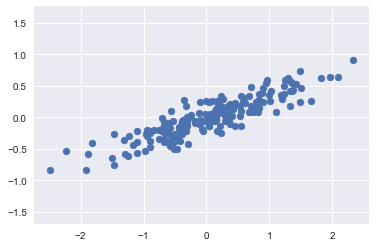

In [6]:
rng = np.random.RandomState(1)

X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

Unlike Linear Regression, rather than attempting to predict the y values from the x values, the unsupervised learning method PCA attempts to learn about the relationship between the x and y values.
In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [10]:
print(pca.components_)
print ('==')
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
==
[ 0.75871884  0.01838551]


visualize the numbers as vectors over the input data, using the 'components' to define the directions of the vectors and the 'explained varaince' to define the squared length of the vectors 

In [14]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


(-2.7407706082556311,
 2.5817738419636962,
 -0.9503241913662932,
 1.022119864077601)

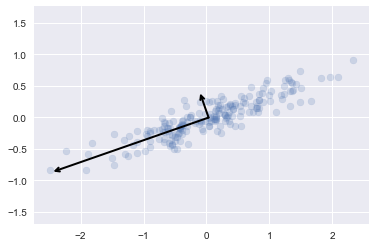

In [15]:
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis. The projection of each data point onto the principal axes are the "principal components" of the data.


In [ ]:
# plot these principal components beside the original data

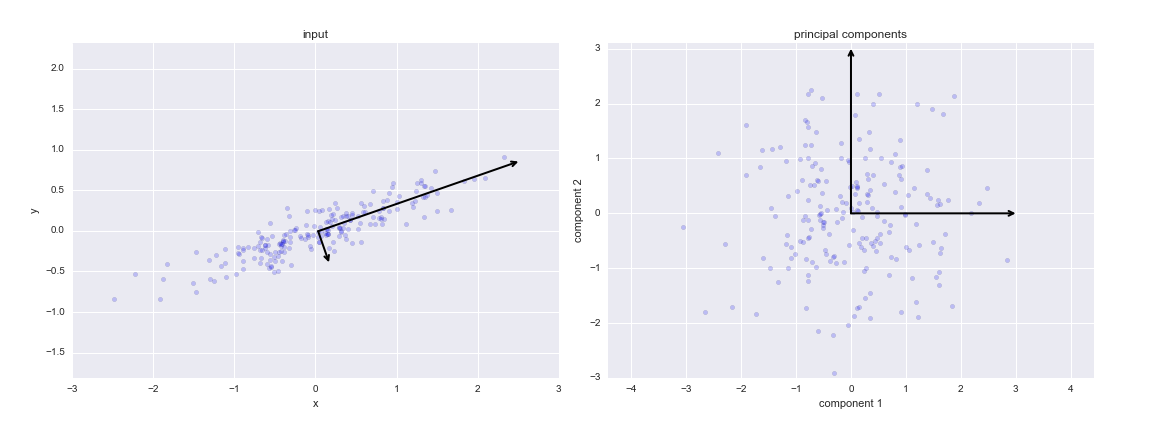

##  PCA as dimensionality reduction


In [16]:
# Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

pca = PCA(n_components = 1)
pca.fit(X)
X_pca = pca.transform(X)

print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)


original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data is redudced to one dimension.

perform inverse transformation of this reduced data and plot it along with the original data.

(-2.78030489102931, 2.670533706929767, -1.0014180896959419, 1.0245529068552033)

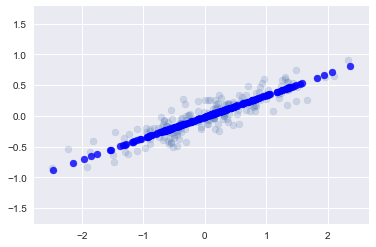

In [21]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha = 0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha = 0.8, color = 'b')
plt.axis('equal')


The light points are the original data, while the dark points are the projected version. This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.
This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

In [ ]:
# how to decide the number of components to use 
# purpose of working on the covarince matrix 
# why largest eigen values indicate the directions of the most variability
# components/ eigen vectors are perpendicular to each other 